# Tutorial for fitting uranium resonances using `pleiades`
Tsviki Y. Hirsh and Alex Long

July 9th 2024

This is a notebook to guide a pleiades user to fitting a neutron transmission spectrum of uranium isotopes. For this tutorial we will be using the simulated data set `u235-u238.twenty` in `examples/data/`

##### import the needed libraries from pleiades

In [1]:
import json
from pleiades import sammyUtils, sammyOutput, sammyPlotter

### Loading a config file for SAMMY fitting

We have a uranium.ini file that contains many of the parameters that we 

In [2]:
# Load the configuration file from the ini file in the parent directory
uranium = sammyUtils.SammyFitConfig('uranium.ini')

#### What happend:
Pleiades has now created a couple of directories base on the keys and vlaues under ['directories'] in makeCompoundFit_Eu.in

Given that sammy needs to use ascii files to run, and also generates additional files that need to be parsed. We have to create a directory that contains all the needed subfolders to configure, execute, and interpret sammy runs. This is done by creating a archive_dir, which can be set in the makeCompoundFit_Eu.ini config file. If none is given then it defualts to ".archive"

Currently nothing is stored in these directories, but we will start filling them with sammy files. i

In [3]:
!ls -lah .archive/

total 16K
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 16:03 .
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 16:03 ..
drwxr-xr-x 5 l280162 l280162 4.0K Jul  9 17:26 endf
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 17:27 u235-u238


#### Now Create the needed parFiles from ENDF for the Eu isotopes

Here we are using the create_parFile_from_endf() funtion with the natEu SammyFitConfig object to create the needed parFiles for each of the Eu isotopes list in the makeCompoundFit_Eu.ini file. 

Note: You can change the print verbose level to print out important variables and paths. 

In [4]:
# Create the needed parFiles from ENDF for the isotopes in the configuration file
sammyUtils.create_parFile_from_endf(uranium,verbose_level=0)

#### <span style="color:red">What happend:</span> 

Pleiades configured two SAMMY runs to generate the needed resonance parameters for the final SAMMY fit. These ENDF SAMMY runs are stored in the 'endf_dir' which is set in makeCompoundFit_Eu.ini

If you `ls` the .archive/endf directory, you will see two sub-dirs: Eu151 & Eu153. Each of these folders contains the results for running SAMMY to generate SAMNDF.PAR files for each respective isotope.

In [5]:
!ls -lah .archive/endf

total 20K
drwxr-xr-x 5 l280162 l280162 4.0K Jul  9 17:26 .
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 16:03 ..
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 17:26 Ta181
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 17:28 U235
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 17:28 U238


#### Configure SAMMY for the fit of Natural Eu

Now that we have the needed SAMNDF.PAR files for each isotope (stored in the .archive/endf/Eu15* folders) we can configure all the needed SAMMY files to fit a naterual Eu transmission spectrum. 

The data for this is stored in `examples/data` and the path is set in makeCompoundFit_Eu.ini as `data_dir = "../data"`

In [6]:
# Configure the sammy run, this will create a compound parFile. 
sammyUtils.configure_sammy_run(uranium,verbose_level=1)

Creating SAMMY parFile files for isotopes: ['U-235', 'U-238'] with abundances: [0.01, 0.01]
Writing output parFile: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/params.par
Creating SAMMY inpFile files for isotopes: ['U-235', 'U-238'] with abundances: [0.01, 0.01]
No config file given. Using default parameters.
Created compound input file: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/input.inp


##### <span style="color:red">What happend:</span> 

Here Pleiades has taken all the needed information from the two (Eu151, Eu153) `SAMNDF.PAR` files and combined them to form a `params.par` file. Additionally Pleiades has created the needed input.inp file to run the natEu SAMMY fit.  

#### running the SAMMY of Uranium foil

Now that everything is set we are prepared to run the actual fit on the natural Eu data. 
Note: You can change the print verbose level to print out important variables and paths. 

In [7]:
# Run the sammy fit.
success = sammyUtils.run_sammy(uranium,verbose_level=1)

Running SAMMY for /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238
Output file: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/output.out
Running SAMMY for u235-u238...
SAMMY executed successfully.


##### <span style="color:red">What happend:</span> 

Here Pleiades should have successfully ran a SAMMY fit on the simulated Urainum transmission data. If is was not successful then we should have gotten an print statement telling us the SAMMY fit failed. 

#### Parsing the output of the SAMMY run on uranium foil. 

Now we can use Pleiades to analyze the results of the SAMMY fit using the `sammyOutput` library

In [8]:
uranium_fit = sammyOutput.lptResults(uranium.params['directories']['sammy_fit_dir']+"/results/SAMMY.LPT")

# Print the final iteration of the fit which are the results we are interested in.
print(json.dumps(uranium_fit._results['Iteration Results'][-1],indent=4))


{
    "Temperature": 296.6,
    "Thickness": 0.11592,
    "DELTA-L": 0.0,
    "DELTA-T-GAUS": 0.001,
    "DELTA-T-EXP": 0.001,
    "NORMALIZATION": "",
    "Backgrounds": {
        "BCKG(CONST)": "",
        "BCKG/SQRT(E)": "",
        "BCKG*SQRT(E)": ""
    },
    "Nuclides": [
        {
            "Number": "1",
            "Abundance": "1.2760E-02",
            "Vary Flag": "(  1)",
            "Mass": "235.044",
            "SpinGroups": "1  2"
        },
        {
            "Number": "2",
            "Abundance": "5.7509E-03",
            "Vary Flag": "(  2)",
            "Mass": "238.051",
            "SpinGroups": "3  4  5"
        }
    ],
    "Chi2": 49552.2,
    "RedChi2": 9.91043
}


Now we can plot the intial and final results, along with the data to see how well SAMMY was able to fit the data. 

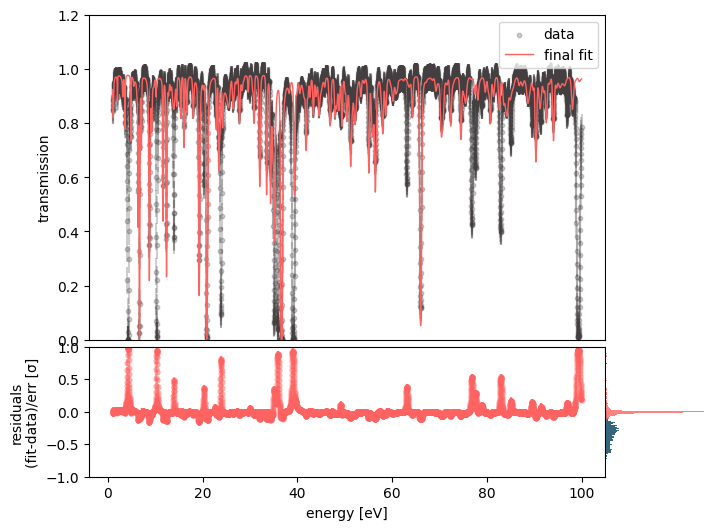

In [9]:
# Plot the results
sammyPlotter.process_and_plot_lst_file(uranium.params['directories']['sammy_fit_dir']+"/results/SAMMY.LST", residual=True,quantity='transmission')

Looking at the plot it appears that we are not capturing all the isotopes! We should think about what isotopes we should add to get a better fit. 

* First list the isotopes and abundances, 
* Then we can update the abundances based on the lptresults
* Finally we can add another isotope, like Ta (hint: its Ta)

In [10]:
# Print out the initial parameters for the isotopes (names and abundances)
print(f"Isotopes: {uranium.params['isotopes']['names']}")
print(f"Initial Abundance: {uranium.params['isotopes']['abundances']}")
print(f"Initial Thickness: {uranium.params['broadening']['thickness']}")

# Update the isotope abundances with the new results from the SAMMY fit
for i, isotope in enumerate(uranium.params['isotopes']['names']):
    uranium.params['isotopes']['abundances'][i] = float(uranium_fit._results['Iteration Results'][-1]['Nuclides'][i]['Abundance'])
    
# Update the sample thickness with the new results from the SAMMY fit
uranium.params['broadening']['thickness'] = float(uranium_fit._results['Iteration Results'][-1]['Thickness'])

# check your work!
print(f"New Abundance: {uranium.params['isotopes']['abundances']}")
print(f"New Thickness: {uranium.params['broadening']['thickness']}")


Isotopes: ['U-235', 'U-238']
Initial Abundance: [0.01, 0.01]
Initial Thickness: 1.0
New Abundance: [0.01276, 0.0057509]
New Thickness: 0.11592


In [11]:
# Add Ta to the isotopes names and set initial abundance to 0.01
uranium.params['isotopes']['names'].append('Ta-181')
uranium.params['isotopes']['abundances'].append(0.01)

# check your work!
print(f"Names: {uranium.params['isotopes']['names']}")
print(f"Abundance: {uranium.params['isotopes']['abundances']}")

Names: ['U-235', 'U-238', 'Ta-181']
Abundance: [0.01276, 0.0057509, 0.01]


In [12]:
# Create the needed parFiles from ENDF for the isotopes in the configuration file
sammyUtils.create_parFile_from_endf(uranium,verbose_level=0)

In [13]:
!ls -lah .archive/endf

total 20K
drwxr-xr-x 5 l280162 l280162 4.0K Jul  9 17:26 .
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 16:03 ..
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 17:29 Ta181
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 17:28 U235
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 17:29 U238


In [14]:
# Configure the sammy run, this will create a compound parFile. 
sammyUtils.configure_sammy_run(uranium,verbose_level=1)

Creating SAMMY parFile files for isotopes: ['U-235', 'U-238', 'Ta-181'] with abundances: [0.01276, 0.0057509, 0.01]
Writing output parFile: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/params.par
Creating SAMMY inpFile files for isotopes: ['U-235', 'U-238', 'Ta-181'] with abundances: [0.01276, 0.0057509, 0.01]
No config file given. Using default parameters.
Created compound input file: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/input.inp


In [15]:
# Run the sammy fit.
success = sammyUtils.run_sammy(uranium,verbose_level=1)

Running SAMMY for /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238
Output file: /home/l280162/Programs/PLEIADES/examples/Notebooks/.archive/u235-u238/output.out
Running SAMMY for u235-u238...
SAMMY executed successfully.


In [19]:
uranium_fit = sammyOutput.lptResults(uranium.params['directories']['sammy_fit_dir']+"/results/SAMMY.LPT")
print(json.dumps(uranium_fit._results['Iteration Results'][-1],indent=4))

{
    "Temperature": 296.6,
    "Thickness": 0.097079,
    "DELTA-L": 0.0,
    "DELTA-T-GAUS": 0.001,
    "DELTA-T-EXP": 0.001,
    "NORMALIZATION": "",
    "Backgrounds": {
        "BCKG(CONST)": "",
        "BCKG/SQRT(E)": "",
        "BCKG*SQRT(E)": ""
    },
    "Nuclides": [
        {
            "Number": "1",
            "Abundance": "1.0028E-02",
            "Vary Flag": "(  1)",
            "Mass": "235.044",
            "SpinGroups": "1  2"
        },
        {
            "Number": "2",
            "Abundance": "4.9281E-03",
            "Vary Flag": "(  2)",
            "Mass": "238.051",
            "SpinGroups": "3  4  5"
        },
        {
            "Number": "3",
            "Abundance": "1.1362E-02",
            "Vary Flag": "(  3)",
            "Mass": "180.948",
            "SpinGroups": "6  7"
        }
    ],
    "Chi2": 54.1535,
    "RedChi2": 0.0108307
}


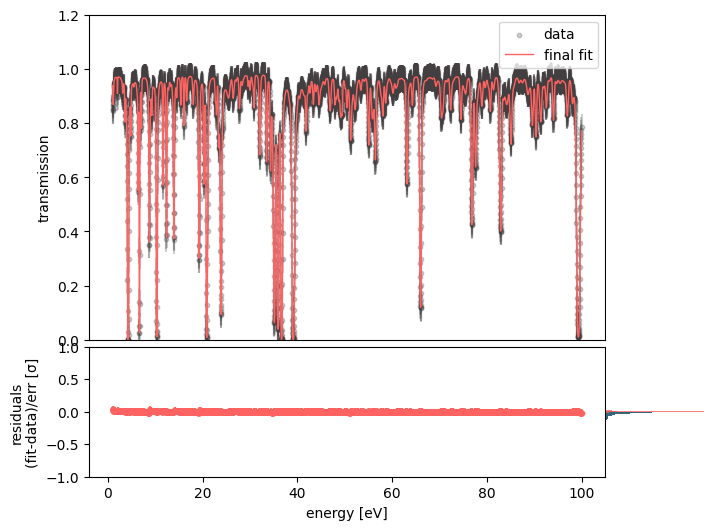

In [17]:
# Plot the results
sammyPlotter.process_and_plot_lst_file(uranium.params['directories']['sammy_fit_dir']+"/results/SAMMY.LST", residual=True,quantity='transmission')